# General import functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import scanpy.api as sc
from igraph import *
from MulticoreTSNE import MulticoreTSNE as TSNE #faster TSNE alternative
from anndata import read_h5ad
from anndata import read_csv
sc.logging.print_versions()

scanpy==1.4.3+60.gb3dc34a anndata==0.6.22rc1 umap==0.3.9 numpy==1.16.4 scipy==1.3.0 pandas==0.23.4 scikit-learn==0.20.1 statsmodels==0.10.0rc2 python-igraph==0.7.1 louvain==0.6.1


In [2]:
pwd

'/home/ubuntu/maca-data-analysis/sapiens'

# Load the data

In [3]:
tissue = 'Pancreas exocrine'

In [6]:
tiss_facs = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-facs-pilot-filtered-PancreasExocrine.h5ad')
tiss_droplet1 = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-exopancreas1.h5ad')
tiss_droplet2 = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-exopancreas2.h5ad')
tiss_facs, tiss_droplet1, tiss_droplet2


(AnnData object with n_obs × n_vars = 321 × 24697 
     obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes'
     var: 'n_cells', AnnData object with n_obs × n_vars = 589 × 21380 
     obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes'
     var: 'n_cells', AnnData object with n_obs × n_vars = 7804 × 21380 
     obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes'
     var: 'n_cells')

In [ ]:
bladder_louvain_cell_ontology_droplet = {}
bladder_louvain_cell_ontology_droplet['0'] = ...
bladder_louvain_cell_ontology_droplet

In [ ]:
tiss.obs['cell_ontology_class'] = tiss.obs['louvain'].map(bladder_louvain_cell_ontology_droplet)
set(tiss.obs['cell_ontology_class'])

# Load the data

In [ ]:
adata

In [ ]:
set(adata.obs['tissue'])

Filter out cells with less than 200 genes detected and genes expressed in less than 3 cells

In [ ]:
adata

save the filtered data

In [ ]:
adata.write('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered.h5ad')

# Annotate the FACS data

In [7]:
tiss_facs = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-facs-pilot-filtered-PancreasExocrine.h5ad')

adata = tiss_facs
adata

AnnData object with n_obs × n_vars = 321 × 24697 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes'
    var: 'n_cells'

In [8]:
igg_genes = adata.var_names[adata.var_names.str.startswith('IGH')]
igg_genes

Index(['IGHMBP2'], dtype='object', name='index')

In [9]:
ercc_genes = adata.var_names[adata.var_names.str.startswith('ERCC-')]
ercc_genes

Index(['ERCC-00002', 'ERCC-00003', 'ERCC-00004', 'ERCC-00009', 'ERCC-00012',
       'ERCC-00013', 'ERCC-00014', 'ERCC-00019', 'ERCC-00022', 'ERCC-00024',
       'ERCC-00025', 'ERCC-00028', 'ERCC-00031', 'ERCC-00033', 'ERCC-00034',
       'ERCC-00035', 'ERCC-00039', 'ERCC-00042', 'ERCC-00043', 'ERCC-00044',
       'ERCC-00046', 'ERCC-00051', 'ERCC-00053', 'ERCC-00054', 'ERCC-00058',
       'ERCC-00059', 'ERCC-00060', 'ERCC-00062', 'ERCC-00067', 'ERCC-00069',
       'ERCC-00071', 'ERCC-00073', 'ERCC-00074', 'ERCC-00076', 'ERCC-00077',
       'ERCC-00078', 'ERCC-00079', 'ERCC-00084', 'ERCC-00085', 'ERCC-00092',
       'ERCC-00095', 'ERCC-00096', 'ERCC-00099', 'ERCC-00108', 'ERCC-00109',
       'ERCC-00111', 'ERCC-00112', 'ERCC-00113', 'ERCC-00116', 'ERCC-00126',
       'ERCC-00130', 'ERCC-00131', 'ERCC-00134', 'ERCC-00136', 'ERCC-00137',
       'ERCC-00138', 'ERCC-00143', 'ERCC-00144', 'ERCC-00145', 'ERCC-00147',
       'ERCC-00148', 'ERCC-00150', 'ERCC-00154', 'ERCC-00157', 'ERCC-00160',

In [10]:
adata = adata[:,~adata.var_names.isin(ercc_genes)]
adata

View of AnnData object with n_obs × n_vars = 321 × 24626 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes'
    var: 'n_cells'

In [11]:
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_genes(adata, min_cells=3)
adata

Trying to set attribute `.obs` of view, making a copy.


AnnData object with n_obs × n_vars = 255 × 16481 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes', 'n_counts'
    var: 'n_cells'

In [12]:
set(adata.obs['tissue'])

{'PancreasExocrine'}

Compute the nUMIS (using 'n_counts' as generic column name)

In [13]:
adata.obs['n_counts'] = adata.X.sum(axis=1)#.A1

Look at the overall distribution of the data

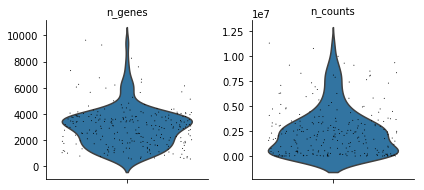

In [14]:
sc.pl.violin(adata, ['n_genes', 'n_counts'],jitter=0.4, multi_panel=True)

/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:318: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:319: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


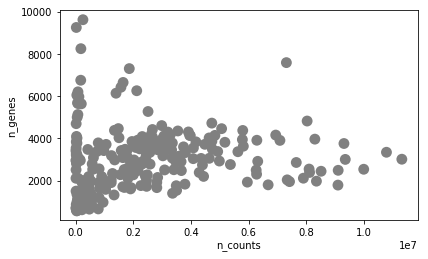

In [15]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

Because we're doing first exploratory pass let's remove cells that have more than 5000 genes given that those have higher chances of being doublets

In [16]:
#adata = adata[adata.obs['n_genes'] < 5000, :]

In [17]:
adata

AnnData object with n_obs × n_vars = 255 × 16481 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes', 'n_counts'
    var: 'n_cells'

Following the standard pipeline, next we normalize, log, compute highly variable genes and scale

In [18]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

In [19]:
sc.pp.log1p(adata)


In [20]:
adata.raw = adata

In [21]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

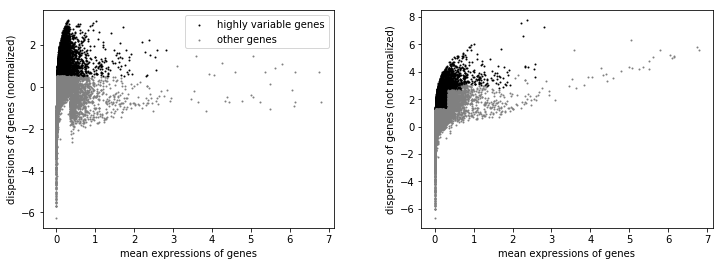

In [22]:
sc.pl.highly_variable_genes(adata)


In [23]:
adata


AnnData object with n_obs × n_vars = 255 × 16481 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [24]:
sc.pp.scale(adata, max_value=10)


Next we compute PCA

In [25]:
sc.tl.pca(adata, svd_solver='arpack')


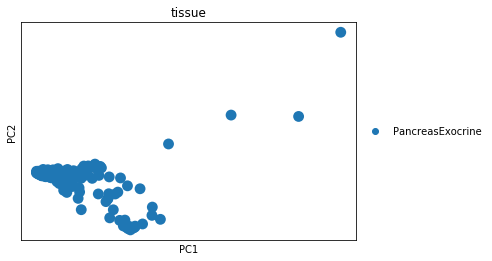

In [26]:
sc.pl.pca(adata, color='tissue')


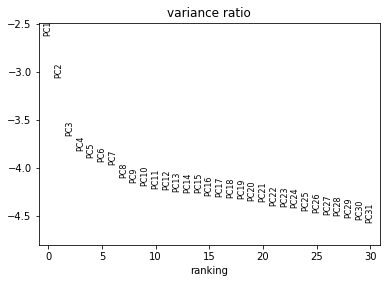

In [27]:
sc.pl.pca_variance_ratio(adata, log=True)


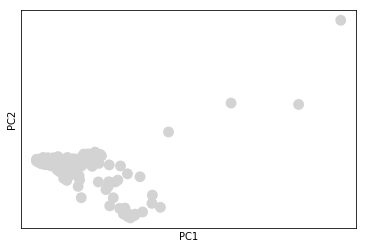

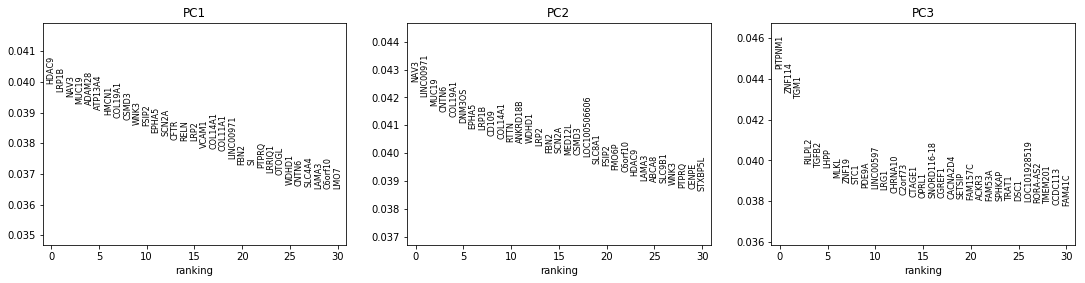

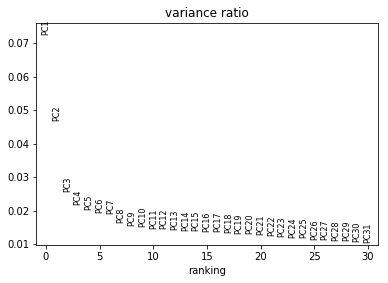

In [28]:
sc.pl.pca_overview(adata)

Now we're ready to start fishing out some structure in the data

In [85]:
sc.pp.neighbors(adata, n_neighbors=8, n_pcs=7)


In [99]:
sc.tl.louvain(adata,resolution=.5)
sc.tl.leiden(adata,resolution=1)

In [100]:
sc.tl.umap(adata)


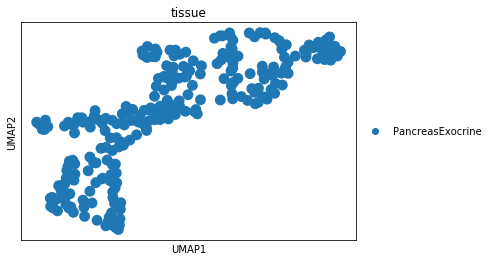

In [101]:
# sc.settings.set_figure_params(dpi=200)
sc.pl.umap(adata, color=['tissue'])

In [102]:
set(adata.obs['tissue'])

{'PancreasExocrine'}

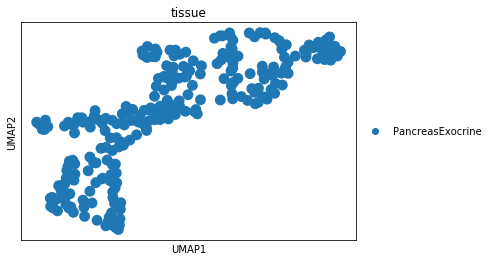

In [103]:
sc.pl.umap(adata, color=['tissue'],use_raw=False)

Let's take a look at one tissue as e.g. for batch effect...

In [104]:
adata.obs.columns

Index(['plate', 'well', 'tissue', 'primary_sort', 'anatomical_position',
       'sort_order', 'well_group', 'excluded', 'sort_direction',
       'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute',
       'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun',
       'additional_notes', 'n_genes', 'n_counts', 'louvain', 'leiden'],
      dtype='object')

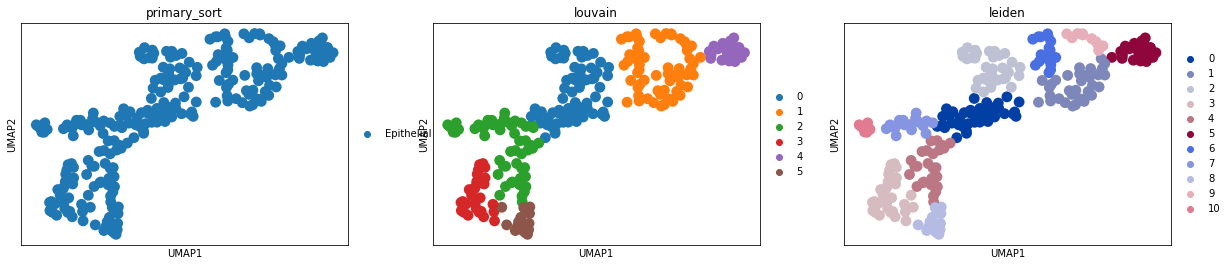

In [105]:
sc.pl.umap(adata, color=['primary_sort','louvain','leiden'])

Looking good! Into clustering...

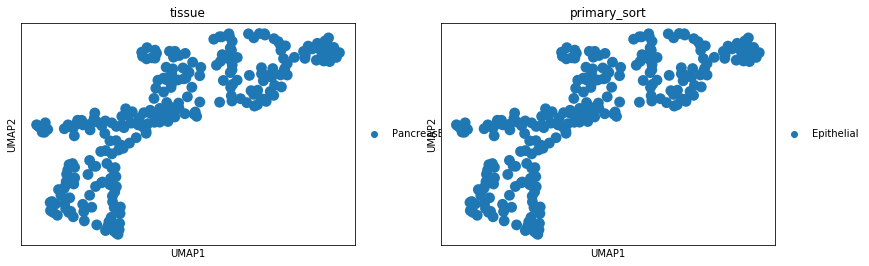

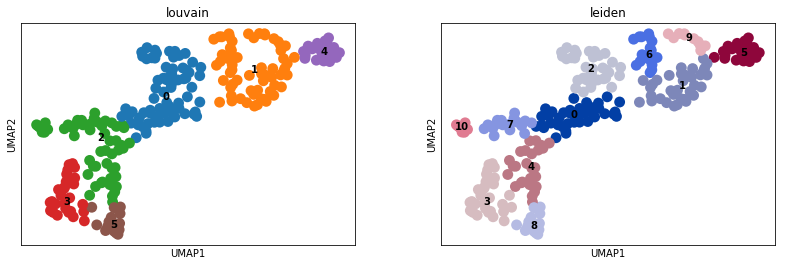

In [106]:
sc.pl.umap(adata, color=['tissue','primary_sort'])
sc.pl.umap(adata, color=['louvain','leiden'], legend_loc='on data')

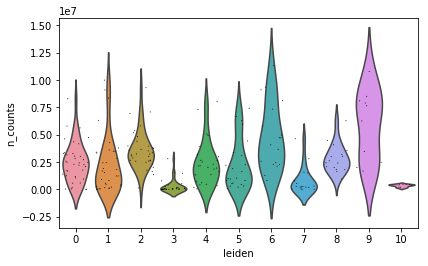

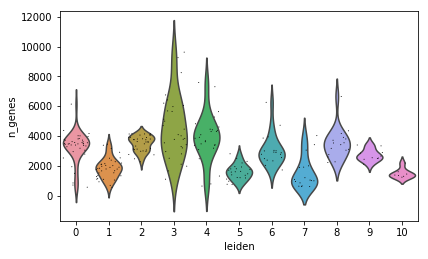

In [107]:
sc.pl.violin(adata, ['n_counts'],jitter=0.4, groupby='leiden')
sc.pl.violin(adata, ['n_genes'],jitter=0.4, groupby='leiden')

Using the wilcoxon rank test we can compute the marker genes for each of the 45 global clusters

In [108]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

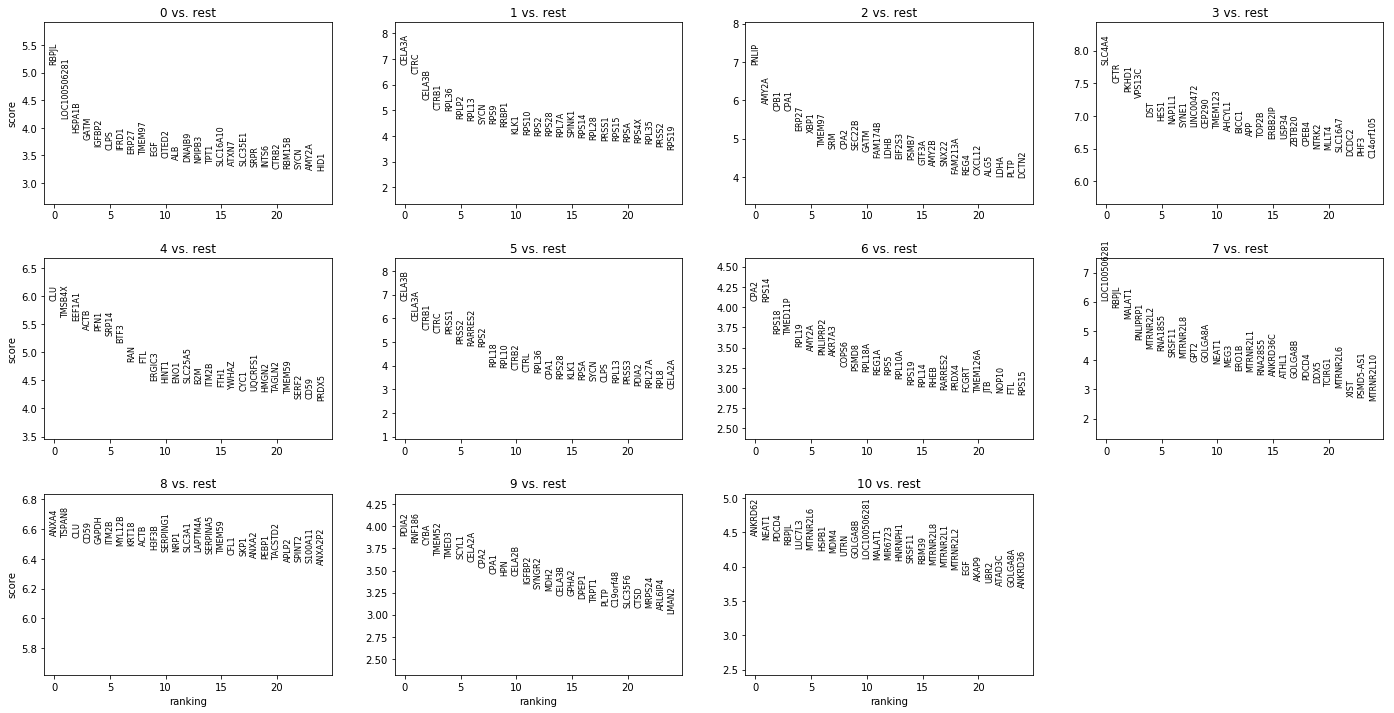

In [109]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [110]:
sapiens_rank_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
# sapiens_rank_genes.to_csv('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-global-rank-genes.csv')
sapiens_rank_genes.head(50)

,0,1,2,3,4,5,6,7,8,9,10
0,RBPJL,CELA3A,PNLIP,SLC4A4,CLU,CELA3B,CPA2,LOC100506281,ANXA4,PDIA2,ANKRD62
1,LOC100506281,CTRC,AMY2A,CFTR,TMSB4X,CELA3A,RPS14,RBPJL,TSPAN8,RNF186,NEAT1
2,HSPA1B,CELA3B,CPB1,PKHD1,EEF1A1,CTRB1,RPS18,MALAT1,CLU,CYBA,PDCD4
3,GATM,CTRB1,CPA1,VPS13C,ACTB,CTRC,TMED11P,PNLIPRP1,CD59,TMEM52,RBPJL
4,IGFBP2,RPL36,ERP27,DST,PFN1,PRSS1,RPL19,MTRNR2L2,GAPDH,TMED3,LUC7L3
5,CLPS,RPLP2,XBP1,HES1,SRP14,PRSS2,AMY2A,RNA18S5,ITM2B,SCYL1,MTRNR2L6
6,IFRD1,RPL13,TMEM97,NAP1L1,BTF3,RARRES2,PNLIPRP2,SRSF11,MYL12B,CELA2A,HSPB1
7,ERP27,SYCN,SRM,SYNE1,RAN,RPS2,AKR7A3,MTRNR2L8,KRT18,CPA2,MDM4
8,TMEM97,RPS9,CPA2,LINC00472,FTL,RPL18,COPS6,GPT2,ACTB,CPA1,UTRN
9,EGF,RRBP1,SEC22B,CEP290,ERGIC3,RPL10,PSMD8,GOLGA8A,H3F3B,HPN,GOLGA8B


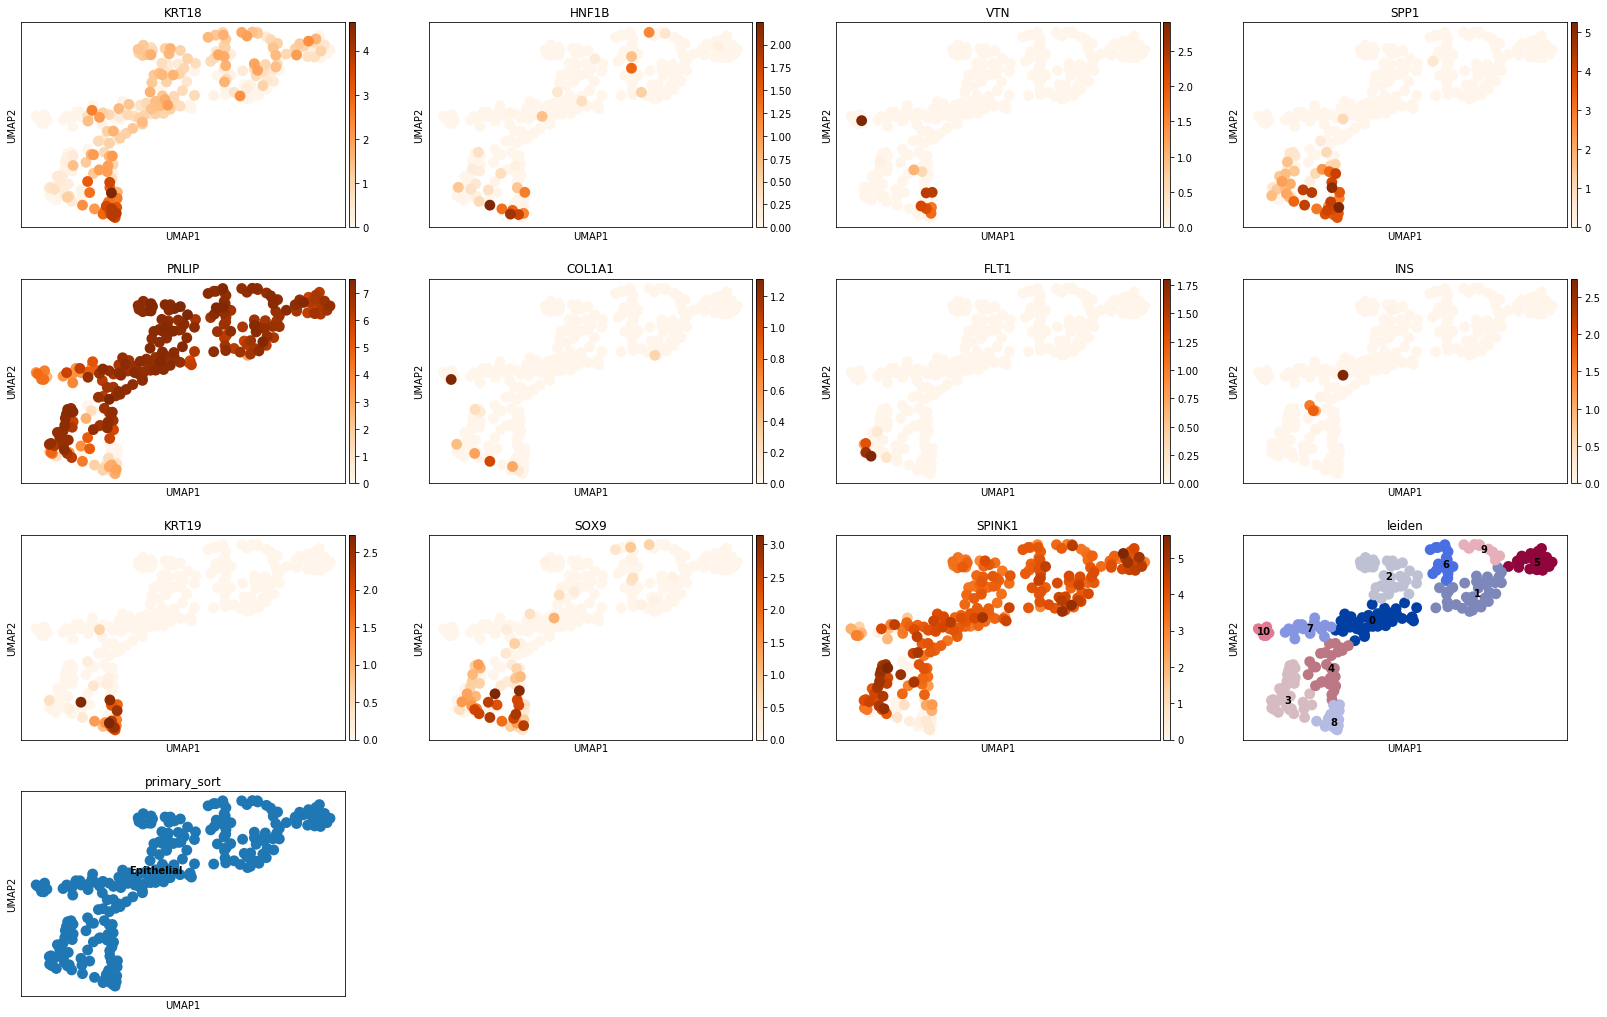

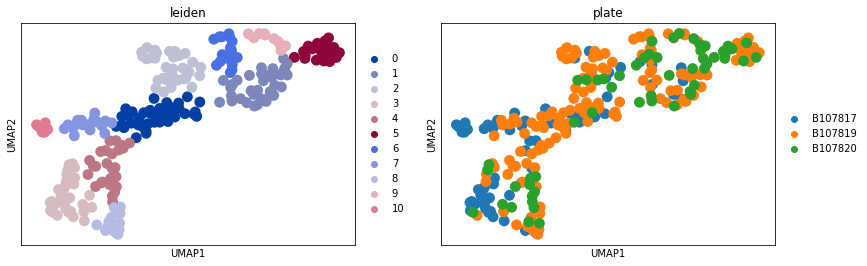

In [118]:
sc.pl.umap(adata,color=['KRT18','HNF1B','VTN', 'SPP1', 'PNLIP', 'COL1A1','FLT1','INS','KRT19','SOX9','SPINK1','leiden','primary_sort'],legend_loc='on data',cmap='Oranges')

sc.pl.umap(adata,color=['leiden','plate'])

# 16&17: fast -- short, immediate
# 19&20: slow, 4h later


In [114]:
insdata = adata[:,'INS']
insdata = insdata.X
insdata = insdata>0

adataINS = adata[adata.obs_names[insdata]]
adataINS

View of AnnData object with n_obs × n_vars = 7 × 16481 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes', 'n_counts', 'louvain', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'tissue_colors', 'neighbors', 'louvain', 'leiden', 'primary_sort_colors', 'louvain_colors', 'leiden_colors', 'rank_genes_groups', 'plate_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [115]:
adataINS.obs.groupby(['leiden','plate']).count()

well  tissue  primary_sort  anatomical_position  sort_order  \
leiden plate                                                                  
0      B107819   1.0     1.0           1.0                  1.0         1.0   
       B107820   NaN     NaN           NaN                  NaN         NaN   
2      B107819   1.0     1.0           1.0                  1.0         1.0   
       B107820   NaN     NaN           NaN                  NaN         NaN   
4      B107819   4.0     4.0           4.0                  4.0         4.0   
       B107820   1.0     1.0           1.0                  1.0         1.0   

                well_group  excluded  sort_direction  investigator  barcode  \
leiden plate                                                                  
0      B107819         1.0       1.0             1.0           1.0      1.0   
       B107820         NaN       NaN             NaN           NaN      NaN   
2      B107819         1.0       1.0             1.0           1.0      1.0   
       B107820         NaN       NaN             NaN           NaN      NaN   
4      B107819         4.0       4.0             4.0           4.0      4.0   
       B107820         1.0       1.0             1.0           1.0      1.0   

                 ...     cDNA_dilute  library_prep  lib_prep_date  \
leiden plate     ...                                                
0      B107819   ...             1.0           1.0            1.0   
       B107820   ...             NaN           NaN            NaN   
2      B107819   ...             1.0           1.0            1.0   
       B107820   ...             NaN           NaN            NaN   
4      B107819   ...             4.0           4.0            4.0   
       B107820   ...             1.0           1.0            1.0   

                bead_cleanup  BA_nM  NovaSeqRun  additional_notes  n_genes  \
leiden plate                                                                 
0      B107819           1.0    1.0         1.0               1.0      1.0   
       B107820           NaN    NaN         NaN               NaN      NaN   
2      B107819           1.0    1.0         1.0               1.0      1.0   
       B107820           NaN    NaN         NaN               NaN      NaN   
4      B107819           4.0    4.0         4.0               4.0      4.0   
       B107820           1.0    1.0         1.0               1.0      1.0   

                n_counts  louvain  
leiden plate                       
0      B107819       1.0      1.0  
       B107820       NaN      NaN  
2      B107819       1.0      1.0  
       B107820       NaN      NaN  
4      B107819       4.0      4.0  
       B107820       1.0      1.0  

[6 rows x 21 columns]

In [ ]:
bladder_louvain_cell_ontology_facs = {}
bladder_louvain_cell_ontology_facs['0'] = 'mast cell (also has basophil marker)' #TPSAB1,TPSB2
bladder_louvain_cell_ontology_facs['1'] = 'endothelial' #PECAM1, VWF, CLDN5
bladder_louvain_cell_ontology_facs['2'] = 'unknown'
bladder_louvain_cell_ontology_facs['3'] = 'fibroblast' #DCN, PDGFRA
bladder_louvain_cell_ontology_facs['4'] = ''
bladder_louvain_cell_ontology_facs[''] = ''
bladder_louvain_cell_ontology_facs[''] = ''
bladder_louvain_cell_ontology_facs

In [131]:
sapiens_rank_genes['10'].values

array(['ANKRD62', 'NEAT1', 'PDCD4', 'RBPJL', 'LUC7L3', 'MTRNR2L6',
       'HSPB1', 'MDM4', 'UTRN', 'GOLGA8B', 'LOC100506281', 'MALAT1',
       'MIR6723', 'HNRNPH1', 'SRSF11', 'RBM39', 'MTRNR2L8', 'MTRNR2L1',
       'MTRNR2L2', 'EGF', 'AKAP9', 'UBR2', 'ATAD3C', 'GOLGA8A', 'ANKRD36',
       'RNA28S5', 'DDX17', 'HSP90AA1', 'ZCCHC11', 'TTN', 'TTC17', 'ACADL',
       'ERRFI1', 'ZNF638', 'HSPA1B', 'ARGLU1', 'SRSF7', 'NPEPPS', 'MEG3',
       'SRRM2', 'HSPA1A', 'IFRD1', 'JMJD1C', 'GGA2', 'P2RX1', 'ACADVL',
       'ATRX', 'PNLIPRP1', 'LOC100996255', 'GRB10', 'SYNE2', 'ATHL1',
       'CUL5', 'APPL1', 'CLK1', 'SEL1L', 'SEC31A', 'XIST', 'C2CD4B',
       'MTR', 'FRYL', 'MYOM1', 'PNLIPRP2', 'HP1BP3', 'BCLAF1', 'RNPC3',
       'INSR', 'ADHFE1', 'ITSN2', 'CD46', 'MIR7641-2', 'SLC25A36',
       'ZMYM6', 'NR5A2', 'GOLGA4', 'KMT2C', 'DMTF1', 'PATL1', 'MLLT6',
       'SEPT2', 'THOC1', 'EML4', 'PIK3C2A', 'LUC7L', 'TRA2A', 'ZNF493',
       'ZFP36L1', 'MTRNR2L10', 'ANKRD36C', 'FNDC3A', 'CENPT', 'HNRNPA2B1',


In [133]:
pancreas_exocrine_leiden_cell_ontology_facs = {}
pancreas_exocrine_leiden_cell_ontology_facs['0'] = 'acinar' # PRSS2, CPA2, CPA1, CTRC, PRSS1, AMY2A
pancreas_exocrine_leiden_cell_ontology_facs['1'] = 'acinar' # AMY2A, CPA1, CPA2, AMY2B, PNLIP
pancreas_exocrine_leiden_cell_ontology_facs['2'] = 'acinar' # stress signature RBPJL
pancreas_exocrine_leiden_cell_ontology_facs['3'] = 'doublets' # KRT8, KRT18, EPCAM, KRT19
pancreas_exocrine_leiden_cell_ontology_facs['4'] = 'doublets' #
pancreas_exocrine_leiden_cell_ontology_facs['5'] = 'acinar' # RBPJL, PNLIP, AMY2A
pancreas_exocrine_leiden_cell_ontology_facs['6'] = 'acinar' # CTRC, CPA2, PRSS2, AMY2A, 'MUC1', PRSS3
pancreas_exocrine_leiden_cell_ontology_facs['7'] = 'acinar' # stressed, CTRC, PRSS1, PRSS2, PRSS3
pancreas_exocrine_leiden_cell_ontology_facs['8'] = 'ductal' # KRT8, KRT18, EPCAM, KRT19
pancreas_exocrine_leiden_cell_ontology_facs['9'] = 'acinar' # CPA1, CPA2
pancreas_exocrine_leiden_cell_ontology_facs['10'] = 'acinar' # stressed, NEAT1
pancreas_exocrine_leiden_cell_ontology_facs

{'0': 'acinar',
 '1': 'acinar',
 '2': 'acinar',
 '3': 'doublets',
 '4': 'doublets',
 '5': 'acinar',
 '6': 'acinar',
 '7': 'acinar',
 '8': 'ductal',
 '9': 'acinar',
 '10': 'acinar'}

Look at different cell types. The idea is to subcluster based on the global cell 

In [ ]:
bladder_epithelial = adata(adata.obs['leiden'].isin(['0','11']))

In [135]:
adata.obs['cell_ontology_class'] = adata.obs['leiden'].map(pancreas_exocrine_leiden_cell_ontology_facs)
set(adata.obs['cell_ontology_class'])

{'acinar', 'doublets', 'ductal'}

In [136]:
adata.write('./Pancreas_exocrine_facs_annotation_round_1.h5ad')

... storing 'cell_ontology_class' as categorical


In [137]:
adata

AnnData object with n_obs × n_vars = 255 × 16481 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes', 'n_counts', 'louvain', 'leiden', 'cell_ontology_class'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'tissue_colors', 'neighbors', 'louvain', 'leiden', 'primary_sort_colors', 'louvain_colors', 'leiden_colors', 'rank_genes_groups', 'plate_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

# Annotate the DROPLET data

In [232]:
tiss_droplet = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-endopancreas.h5ad')

adata = tiss_droplet
adata

AnnData object with n_obs × n_vars = 3308 × 21380 
    obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes'
    var: 'n_cells'

In [233]:
igg_genes = adata.var_names[adata.var_names.str.startswith('IGH')]
igg_genes

Index(['IGHMBP2'], dtype='object', name='index')

In [234]:
ercc_genes = adata.var_names[adata.var_names.str.startswith('ERCC-')]
ercc_genes

Index([], dtype='object', name='index')

In [235]:
adata = adata[:,~adata.var_names.isin(ercc_genes)]
adata

View of AnnData object with n_obs × n_vars = 3308 × 21380 
    obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes'
    var: 'n_cells'

In [236]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_cells(adata, min_counts=2000)
sc.pp.filter_genes(adata, min_cells=3)

Trying to set attribute `.obs` of view, making a copy.


In [237]:
set(adata.obs['tissue'])

{'endopancreas'}

Compute the nUMIS (using 'n_counts' as generic column name)

In [238]:
adata.obs['n_counts'] = adata.X.sum(axis=1)#.A1

Look at the overall distribution of the data

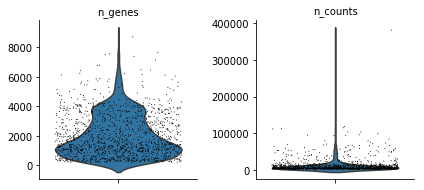

In [239]:
sc.pl.violin(adata, ['n_genes', 'n_counts'],jitter=0.4, multi_panel=True)

/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:318: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:319: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


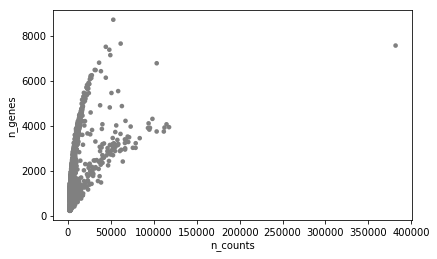

In [240]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

Because we're doing first exploratory pass let's remove cells that have more than 5000 genes given that those have higher chances of being doublets

In [241]:
#adata = adata[adata.obs['n_genes'] < 5000, :]

In [242]:
adata

AnnData object with n_obs × n_vars = 1408 × 16204 
    obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes', 'n_counts'
    var: 'n_cells'

Following the standard pipeline, next we normalize, log, compute highly variable genes and scale

In [243]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

In [244]:
sc.pp.log1p(adata)


In [245]:
adata.raw = adata

In [246]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

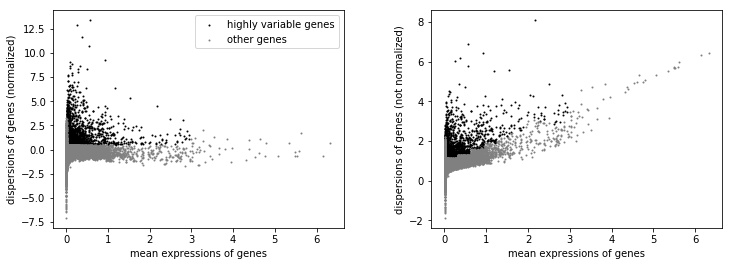

In [247]:
sc.pl.highly_variable_genes(adata)


In [248]:
adata


AnnData object with n_obs × n_vars = 1408 × 16204 
    obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [249]:
sc.pp.scale(adata, max_value=10)


Next we compute PCA

In [250]:
sc.tl.pca(adata, svd_solver='arpack')


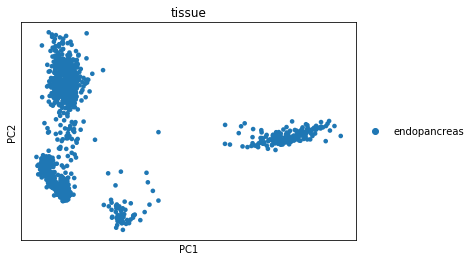

In [251]:
sc.pl.pca(adata, color='tissue')


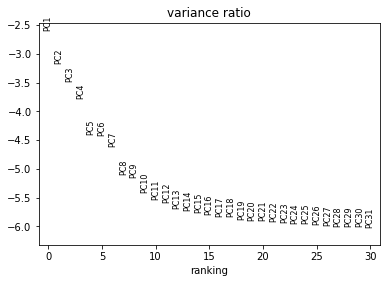

In [252]:
sc.pl.pca_variance_ratio(adata, log=True)


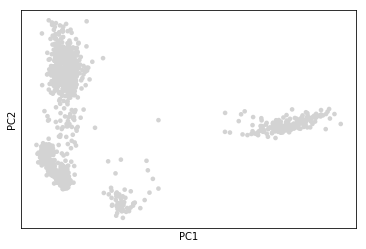

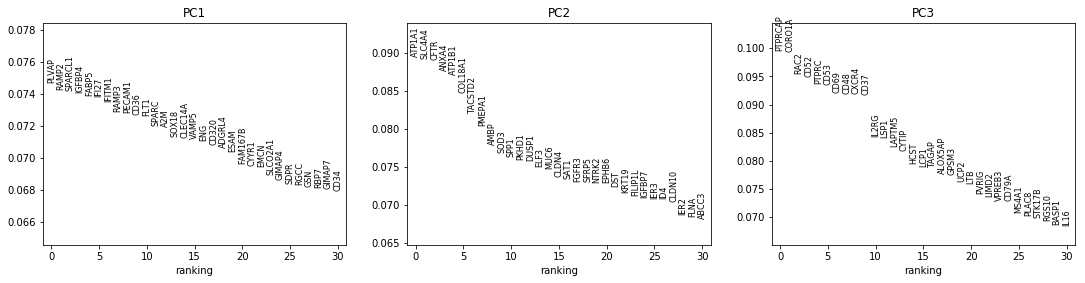

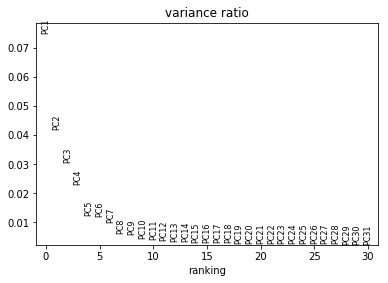

In [253]:
sc.pl.pca_overview(adata)

Now we're ready to start fishing out some structure in the data

In [254]:
sc.pp.neighbors(adata, n_neighbors=12, n_pcs=9)


In [255]:
sc.tl.louvain(adata)
sc.tl.leiden(adata)

In [256]:
sc.tl.umap(adata)


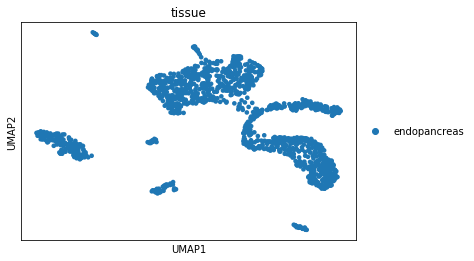

In [257]:
# sc.settings.set_figure_params(dpi=200)
sc.pl.umap(adata, color=['tissue'])

In [258]:
set(adata.obs['tissue'])

{'endopancreas'}

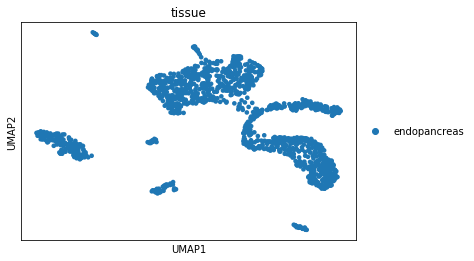

In [259]:
sc.pl.umap(adata, color=['tissue'],use_raw=False)

Let's take a look at one tissue as e.g. for batch effect...

In [260]:
adata.obs.columns

Index(['10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes',
       'n_counts', 'louvain', 'leiden'],
      dtype='object')

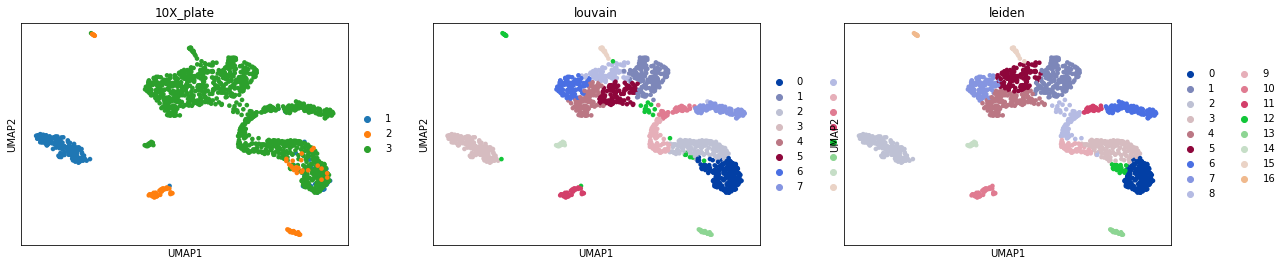

In [261]:
sc.pl.umap(adata, color=['10X_plate','louvain','leiden'])

Looking good! Into clustering...

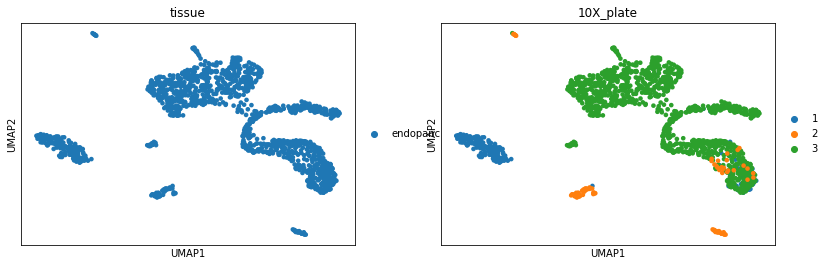

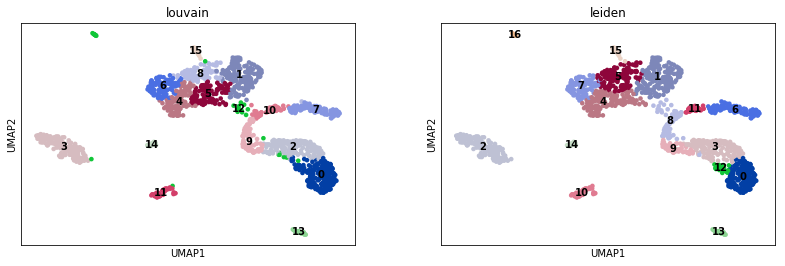

In [262]:
sc.pl.umap(adata, color=['tissue','10X_plate'])
sc.pl.umap(adata, color=['louvain','leiden'], legend_loc='on data')
#10X_plate: Plate 1 -- CD31+ endo/stroma
#10X_plate: Plate 2 -- Cd45+ islet/immune
#10X_plate: Plate 3 -- acinar/duct

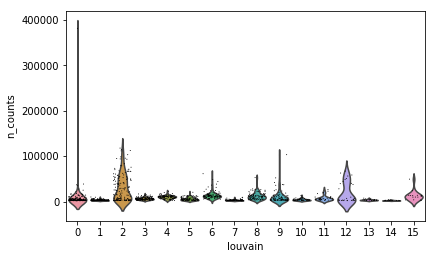

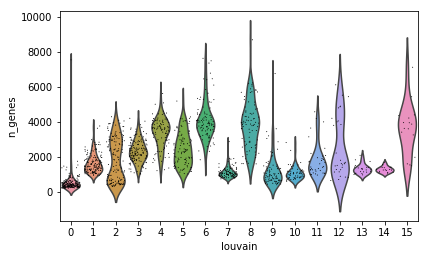

In [263]:
sc.pl.violin(adata, ['n_counts'],jitter=0.4, groupby='louvain')
sc.pl.violin(adata, ['n_genes'],jitter=0.4, groupby='louvain')

Using the wilcoxon rank test we can compute the marker genes for each of the 45 global clusters

In [269]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

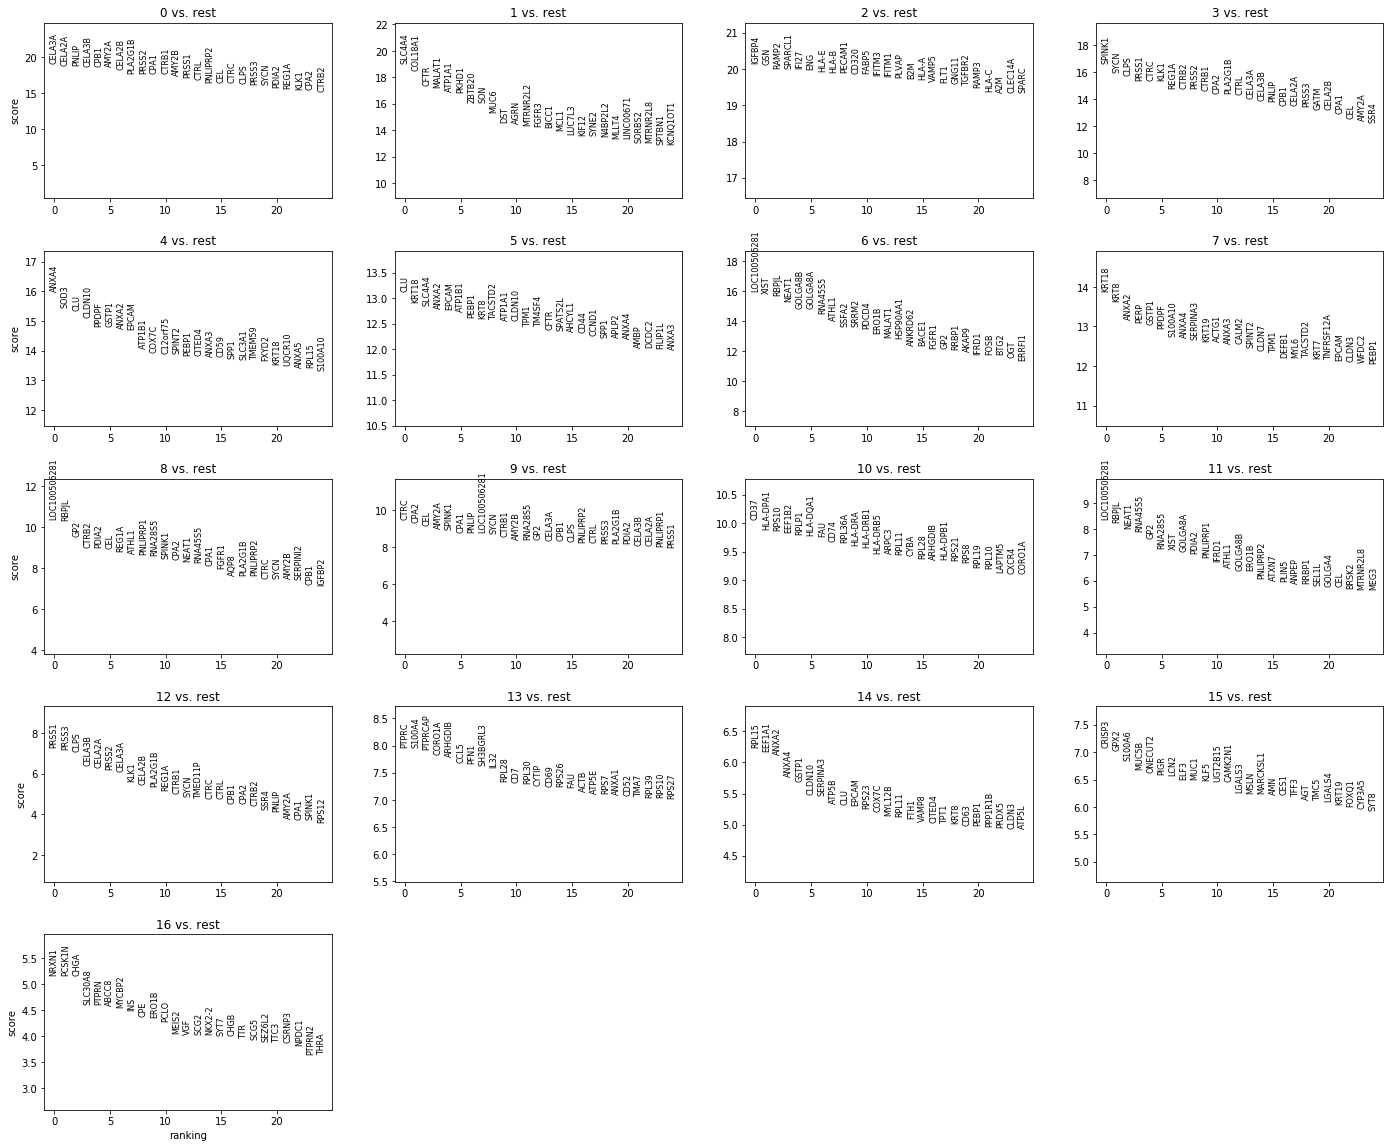

In [270]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [271]:
sapiens_rank_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
# sapiens_rank_genes.to_csv('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-global-rank-genes.csv')
sapiens_rank_genes.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,CELA3A,SLC4A4,IGFBP4,SPINK1,ANXA4,CLU,LOC100506281,KRT18,LOC100506281,CTRC,CD37,LOC100506281,PRSS1,PTPRC,RPL15,CRISP3,NRXN1
1,CELA2A,COL18A1,GSN,SYCN,SOD3,KRT18,XIST,KRT8,RBPJL,CPA2,HLA-DPA1,RBPJL,PRSS3,S100A4,EEF1A1,GPX2,PCSK1N
2,PNLIP,CFTR,RAMP2,CLPS,CLU,SLC4A4,RBPJL,ANXA2,GP2,CEL,RPS10,NEAT1,CLPS,PTPRCAP,ANXA2,S100A6,CHGA
3,CELA3B,MALAT1,SPARCL1,PRSS1,CLDN10,ANXA2,NEAT1,PERP,CTRB2,AMY2A,EEF1B2,RNA45S5,CELA3B,CORO1A,ANXA4,MUC5B,SLC30A8
4,CPB1,ATP1A1,IFI27,CTRC,PPDPF,EPCAM,GOLGA8B,GSTP1,PDIA2,SPINK1,RPLP1,GP2,CELA2A,ARHGDIB,GSTP1,ONECUT2,PTPRN
5,AMY2A,PKHD1,ENG,KLK1,GSTP1,ATP1B1,GOLGA8A,PPDPF,CEL,CPA1,HLA-DQA1,RNA28S5,PRSS2,CCL5,CLDN10,PIGR,ABCC8
6,CELA2B,ZBTB20,HLA-E,REG1A,ANXA2,PEBP1,RNA45S5,S100A10,REG1A,PNLIP,FAU,XIST,CELA3A,PFN1,SERPINA3,LCN2,MYCBP2
7,PLA2G1B,SON,HLA-B,CTRB2,EPCAM,KRT8,ATHL1,ANXA4,ATHL1,LOC100506281,CD74,GOLGA8A,KLK1,SH3BGRL3,ATP5B,ELF3,INS
8,PRSS2,MUC6,PECAM1,PRSS2,ATP1B1,TACSTD2,SSFA2,SERPINA3,PNLIPRP1,SYCN,RPL36A,PDIA2,CELA2B,IL32,CLU,MUC1,CPE
9,CPA1,DST,CD320,CTRB1,COX7C,ATP1A1,SRRM2,KRT19,RNA28S5,CTRB1,HLA-DRA,PNLIPRP1,PLA2G1B,RPL28,EPCAM,KLF5,ERO1B


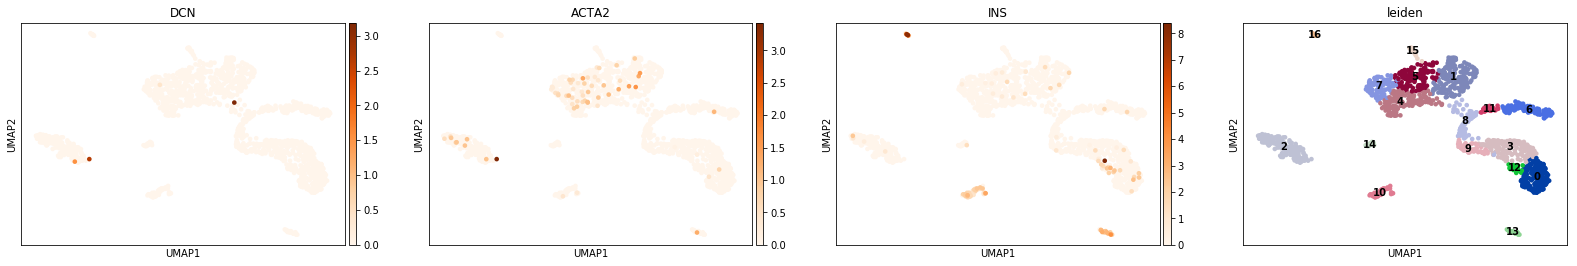

In [287]:
sc.pl.umap(adata,color=['DCN','ACTA2','INS','leiden'],legend_loc='on data',cmap='Oranges')


In [ ]:
bladder_louvain_cell_ontology_facs = {}
bladder_louvain_cell_ontology_facs['0'] = 'mast cell (also has basophil marker)' #TPSAB1,TPSB2
bladder_louvain_cell_ontology_facs['1'] = 'endothelial' #PECAM1, VWF, CLDN5
bladder_louvain_cell_ontology_facs['2'] = 'unknown'
bladder_louvain_cell_ontology_facs['3'] = 'fibroblast' #DCN, PDGFRA
bladder_louvain_cell_ontology_facs['4'] = ''
bladder_louvain_cell_ontology_facs[''] = ''
bladder_louvain_cell_ontology_facs[''] = ''
bladder_louvain_cell_ontology_facs

In [297]:
adata.obs.groupby(['leiden']).count()

,10X_plate,batch,tissue,method,sex,subjectid,n_genes,n_counts,louvain
leiden,,,,,,,,,
0,179,179,179,179,179,179,179,179,179
1,176,176,176,176,176,176,176,176,176
2,152,152,152,152,152,152,152,152,152
3,151,151,151,151,151,151,151,151,151
4,140,140,140,140,140,140,140,140,140
5,124,124,124,124,124,124,124,124,124
6,98,98,98,98,98,98,98,98,98
7,97,97,97,97,97,97,97,97,97
8,74,74,74,74,74,74,74,74,74


In [294]:
sapiens_rank_genes['16'].values

array(['NRXN1', 'PCSK1N', 'CHGA', 'SLC30A8', 'PTPRN', 'ABCC8', 'MYCBP2',
       'INS', 'CPE', 'ERO1B', 'PCLO', 'MEIS2', 'VGF', 'SCG2', 'NKX2-2',
       'SYT7', 'CHGB', 'TTR', 'SCG5', 'SEZ6L2', 'TTC3', 'CSRNP3', 'NPDC1',
       'PTPRN2', 'THRA', 'CHD7', 'ASH1L', 'TNRC6B', 'NEUROD1', 'PCSK2',
       'GAD2', 'SCG3', 'CACNA1A', 'GCG', 'BAIAP3', 'CACNA1D', 'RANBP2',
       'CEP126', 'SLC7A8', 'DDX24', 'MAFB', 'MTRNR2L2', 'KIF1A', 'TNRC6A',
       'NMT1', 'TANC2', 'SCGN', 'SPEN', 'MALAT1', 'ARGLU1', 'PSMA3-AS1',
       'ZKSCAN1', 'AKAP9', 'MACF1', 'IDS', 'TMEM259', 'LDLRAP1', 'PAPSS2',
       'ARFGEF3', 'ZNF827', 'PREPL', 'TOLLIP', 'KIAA1324', 'KCNK16',
       'G6PC2', 'CELF3', 'ISL1', 'LINC00643', 'RIMS2', 'CACNA2D1', 'PAX6',
       'GOLGA2', 'PCSK1', 'DDB1', 'VWA5B2', 'WNT4', 'GCNT1', 'PPP1R1A',
       'HERC2P2', 'ETV1', 'MAP1B', 'ZDHHC21', 'VEGFA', 'UNC80', 'TCF25',
       'CADPS', 'MARCH6', 'APLP1', 'PRPF8', 'GPX3', 'USH1C', 'GC',
       'CXXC4', 'MTHFR', 'PLD3', 'MTMR9LP', 'ATP2A3', 'RB

In [ ]:
pancreas_endocrine_louvain_cell_ontology_droplet = {}
pancreas_endocrine_louvain_cell_ontology_droplet['0'] = 'acinar' # CPA2,MUC1, RBPJL, PRSS1, SPINK1
pancreas_endocrine_louvain_cell_ontology_droplet['1'] = '?' # 
pancreas_endocrine_louvain_cell_ontology_droplet['2'] = 'endothelial' #VWF,CD34,VIM,CAV1,CLDN5,SPARC
pancreas_endocrine_louvain_cell_ontology_droplet['3'] = 'acinar'# SPINK1,PRSS1,AMY2A
pancreas_endocrine_louvain_cell_ontology_droplet['4'] = 'ductal' # EPCAM, KRT18,COX5B,ANXA2,CFTR
pancreas_endocrine_louvain_cell_ontology_droplet['5'] = 'ductal' # EPCAM, KRT18,COX5B,ANXA2,CFTR, SOX9
pancreas_endocrine_louvain_cell_ontology_droplet['6'] = 'acinar' # stressed, 'GOLGA8B', 'GOLGA8A', HSPH1,HSPB1, RBPJL
pancreas_endocrine_louvain_cell_ontology_droplet['7'] = 'ductal' # EPCAM, S100A11, S100A6, KRT18', 'KRT8
pancreas_endocrine_louvain_cell_ontology_droplet['8'] = 'acinar' #RBPJL, PRSS2, PRSS3, NEAT1, PRSS1, AMY2A
pancreas_endocrine_louvain_cell_ontology_droplet['9'] = 'acinar' # AMY2A', 'SPINK1, PRSS1, PRSS2, PRSS3,RBPJL, GOLGA8B
pancreas_endocrine_louvain_cell_ontology_droplet['10'] = 'immune' #CD74, CXCR4
pancreas_endocrine_louvain_cell_ontology_droplet['11'] = 'acinar' #RBPJL', 'NEAT1,GP2
pancreas_endocrine_louvain_cell_ontology_droplet['12'] = 'acinar' #PRSS1', 'PRSS3, SPINK1, AMY2A, INS
pancreas_endocrine_louvain_cell_ontology_droplet['13'] = 'immune' #PTPRC
pancreas_endocrine_louvain_cell_ontology_droplet['14'] = 'ductal' #EPCAM, KRT18, KRT8
pancreas_endocrine_louvain_cell_ontology_droplet['15'] = 'ductal' #S100A6, KRT19, MUC1, IL18
pancreas_endocrine_louvain_cell_ontology_droplet['16'] = 'islet' # INS, NKX2-2, CHGB, CHGA,MAFB,PAX6
pancreas_endocrine_louvain_cell_ontology_droplet

Look at different cell types. The idea is to subcluster based on the global cell 

In [ ]:
bladder_epithelial = adata(adata.obs['leiden'].isin(['0','11']))

In [138]:
adata

AnnData object with n_obs × n_vars = 255 × 16481 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes', 'n_counts', 'louvain', 'leiden', 'cell_ontology_class'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'tissue_colors', 'neighbors', 'louvain', 'leiden', 'primary_sort_colors', 'louvain_colors', 'leiden_colors', 'rank_genes_groups', 'plate_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [141]:
adata.var_names[adata.var_names.str.startswith('MT')]

Index(['MT1A', 'MT1E', 'MT1F', 'MT1G', 'MT1H', 'MT1HL1', 'MT1L', 'MT1M',
       'MT1X', 'MT2A', 'MTA1', 'MTA2', 'MTA3', 'MTAP', 'MTBP', 'MTCH1',
       'MTCH2', 'MTCL1', 'MTCP1', 'MTDH', 'MTERF1', 'MTERF2', 'MTERF3',
       'MTERF4', 'MTF1', 'MTF2', 'MTFMT', 'MTFP1', 'MTFR1', 'MTFR1L', 'MTFR2',
       'MTG1', 'MTG2', 'MTHFD1', 'MTHFD1L', 'MTHFD2', 'MTHFD2L', 'MTHFR',
       'MTHFS', 'MTHFSD', 'MTIF2', 'MTIF3', 'MTL5', 'MTM1', 'MTMR1', 'MTMR10',
       'MTMR11', 'MTMR12', 'MTMR14', 'MTMR2', 'MTMR3', 'MTMR4', 'MTMR6',
       'MTMR7', 'MTMR8', 'MTMR9', 'MTMR9LP', 'MTO1', 'MTOR', 'MTPAP', 'MTR',
       'MTRF1', 'MTRF1L', 'MTRNR2L1', 'MTRNR2L10', 'MTRNR2L2', 'MTRNR2L6',
       'MTRNR2L8', 'MTRNR2L9', 'MTRR', 'MTSS1', 'MTSS1L', 'MTTP', 'MTURN',
       'MTUS1', 'MTUS2', 'MTX1', 'MTX2', 'MTX3'],
      dtype='object', name='index')